### Identifica el tipo de archivo .data y la forma de leerlo

In [1]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("wine_fraud.csv")

# Muestra los primeros 5 registros
df.head()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

### Estudia las variables cuantitativas mediante técnicas de estadística descriptiva

In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
type                     object
dtype: object

### Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos

In [4]:
# importamos librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

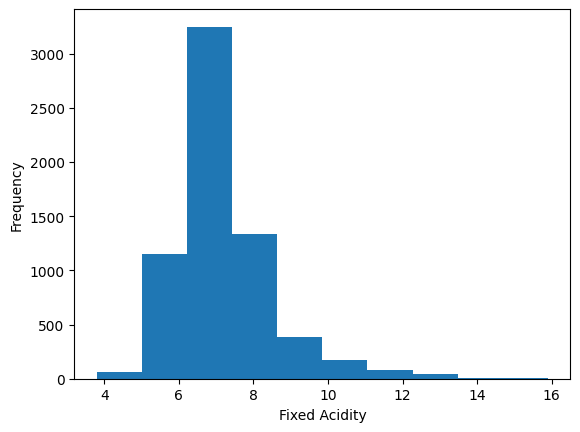

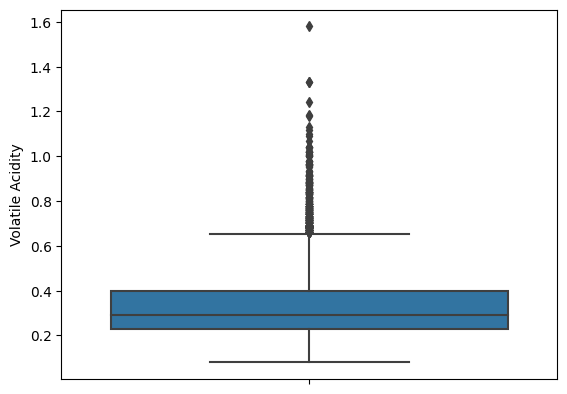

type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


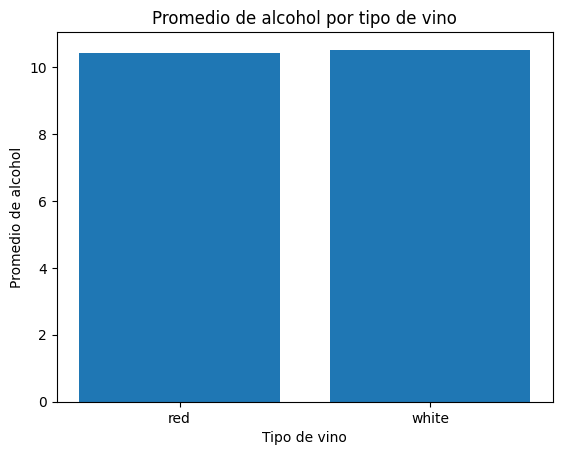

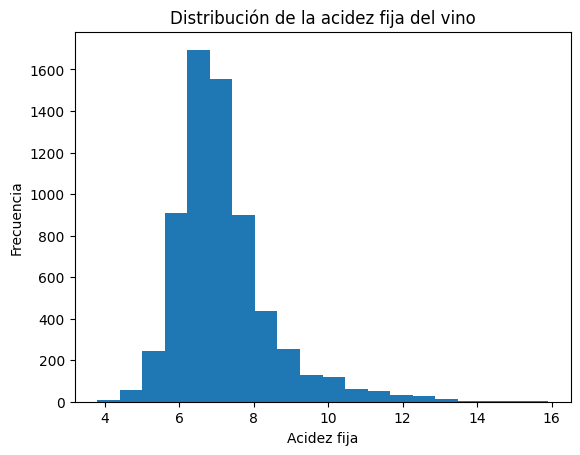

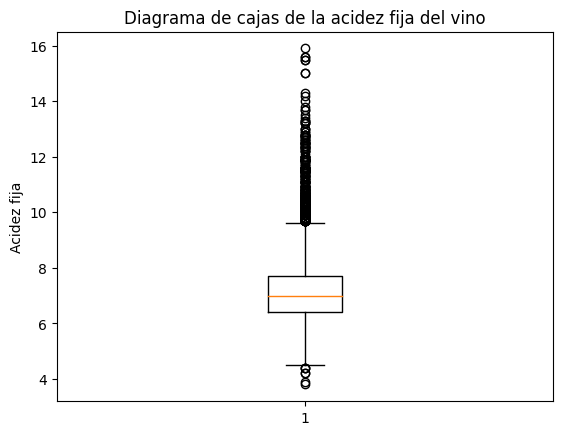

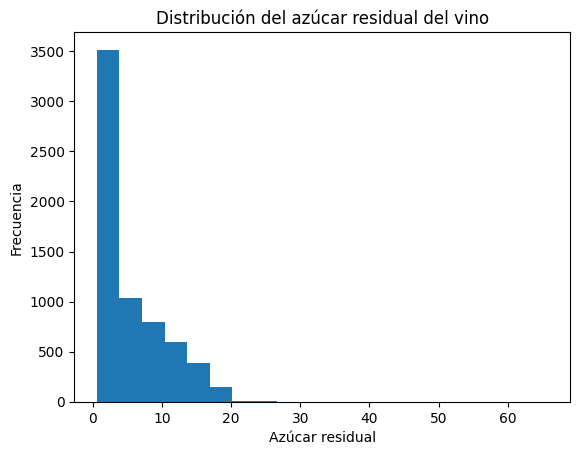

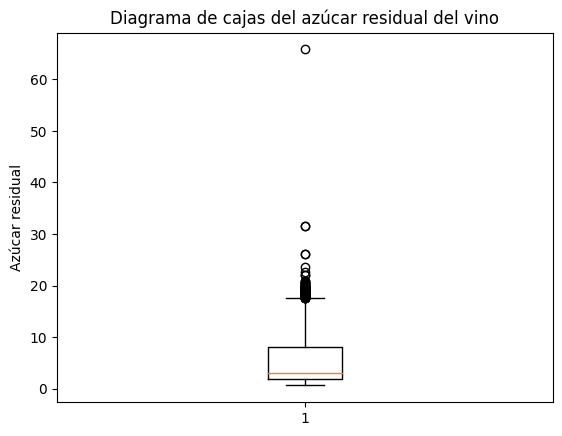

In [17]:
# Creamos el gráfico de barras de acidez
plt.hist(df['fixed acidity'], bins=10)
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

# Creamos el gráfico de caja y bigotes de la acidez volatil
sns.boxplot(y=df['volatile acidity'])
plt.ylabel('Volatile Acidity')
plt.show()

promedio_alcohol = df.groupby('type')['alcohol'].mean()
print(promedio_alcohol)
# Creamos el gráfico de barras
plt.bar(promedio_alcohol.index, promedio_alcohol.values)
plt.xlabel('Tipo de vino')
plt.ylabel('Promedio de alcohol')
plt.title('Promedio de alcohol por tipo de vino')
plt.show()

plt.hist(df['fixed acidity'], bins=20)
plt.xlabel('Acidez fija')
plt.ylabel('Frecuencia')
plt.title('Distribución de la acidez fija del vino')
plt.show()

plt.boxplot(df['fixed acidity'])
plt.ylabel('Acidez fija')
plt.title('Diagrama de cajas de la acidez fija del vino')
plt.show()

plt.hist(df['residual sugar'], bins=20)
plt.xlabel('Azúcar residual')
plt.ylabel('Frecuencia')
plt.title('Distribución del azúcar residual del vino')
plt.show()

plt.boxplot(df['residual sugar'])
plt.ylabel('Azúcar residual')
plt.title('Diagrama de cajas del azúcar residual del vino')
plt.show()

### Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

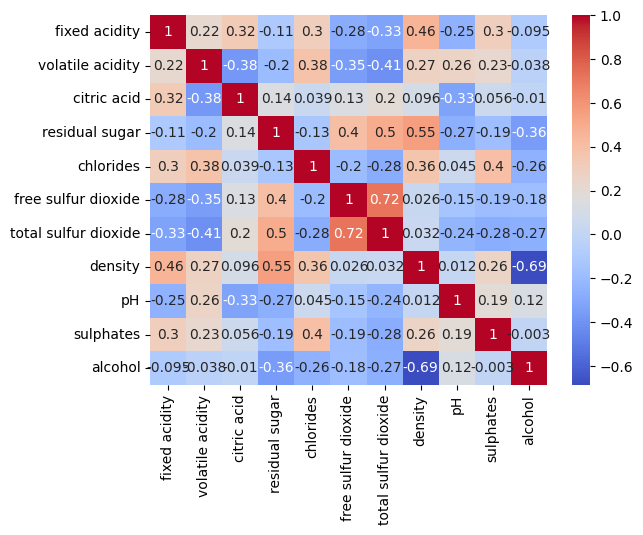

In [8]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


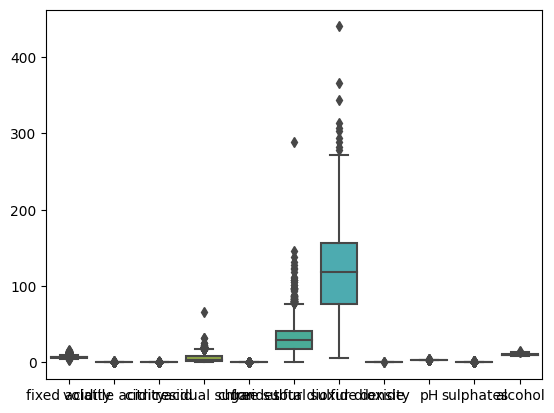

In [9]:
sns.boxplot(data=df)
plt.show()

In [10]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


Así miramos la correlación de los datos, los valores atípicos y si tenemos valores faltantes, donde nos damos cuenta que no es el caso.

### Estudia las variables categóricas


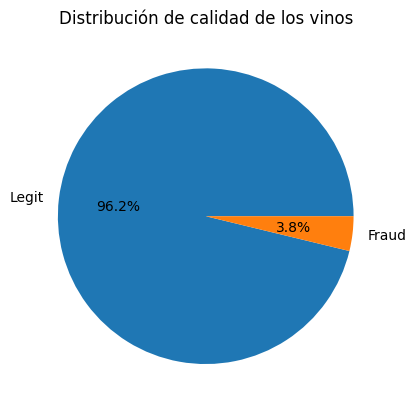

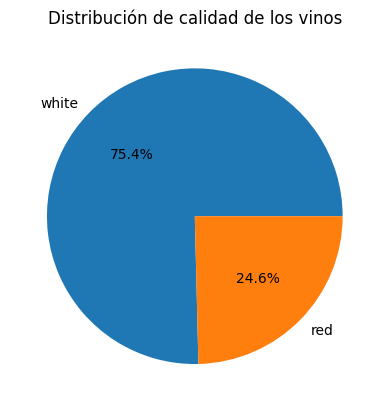

In [15]:
# Creamos el gráfico de pie de calidad
plt.pie(df['quality'].value_counts(), labels=df['quality'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de calidad de los vinos')
plt.show()

# Creamos el gráfico de pie de tipo
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribución de calidad de los vinos')
plt.show()


### LIMPIEZA DE DATOS

In [29]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Lee el archivo CSV
df = pd.read_csv("wine_fraud.csv")

# Muestra los primeros 5 registros
df.head()
df.tail()

# LA CALIDAD, 1 SI ES LEGITIMO, 0 SI ES FRAUDULENTO Y CONVERTIR A NUMERICA
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'Legit' else 0)
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
# LA CALIDAD, 1 SI ES VINO BLANCO, 0 SI ES VINO ROJO Y CONVERTIR A NUMERICA
df['type'] = df['type'].apply(lambda x: 1 if x == 'white' else 0)
df['type'] = pd.to_numeric(df['type'], errors='coerce')

# Eliminar valores atípicos
df = df[(np.abs(df['fixed acidity']-df['fixed acidity'].mean()) <= (3*df['fixed acidity'].std())) &
        (np.abs(df['volatile acidity']-df['volatile acidity'].mean()) <= (3*df['volatile acidity'].std())) &
        (np.abs(df['citric acid']-df['citric acid'].mean()) <= (3*df['citric acid'].std())) &
        (np.abs(df['residual sugar']-df['residual sugar'].mean()) <= (3*df['residual sugar'].std())) &
        (np.abs(df['chlorides']-df['chlorides'].mean()) <= (3*df['chlorides'].std())) &
        (np.abs(df['free sulfur dioxide']-df['free sulfur dioxide'].mean()) <= (3*df['free sulfur dioxide'].std())) &
        (np.abs(df['total sulfur dioxide']-df['total sulfur dioxide'].mean()) <= (3*df['total sulfur dioxide'].std())) &
        (np.abs(df['density']-df['density'].mean()) <= (3*df['density'].std())) &
        (np.abs(df['pH']-df['pH'].mean()) <= (3*df['pH'].std())) &
        (np.abs(df['sulphates']-df['sulphates'].mean()) <= (3*df['sulphates'].std())) &
        (np.abs(df['alcohol']-df['alcohol'].mean()) <= (3*df['alcohol'].std()))]

# Tratar los valores faltantes
df = df.dropna()

# Normalización de datos
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

df.to_csv('wine_fraud_cleaned.csv')

# AL LEERLO LEELO CON HEADER=0 PARA QUE NO TIRE ERRORES POR NOMBRES DE COLUMNAS


In [3]:
# Por convencion, es necesario normalizar los datos para entrenar los modelos de SVM y SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv("wine_fraud.csv")

# LA CALIDAD, 1 SI ES LEGITIMO, 0 SI ES FRAUDULENTO Y CONVERTIR A NUMERICA
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'Legit' else 0)
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
# LA CALIDAD, 1 SI ES VINO BLANCO, 0 SI ES VINO ROJO Y CONVERTIR A NUMERICA
df['type'] = df['type'].apply(lambda x: 1 if x == 'white' else 0)
df['type'] = pd.to_numeric(df['type'], errors='coerce')

# Eliminar valores atípicos
df = df[(np.abs(df['fixed acidity']-df['fixed acidity'].mean()) <= (3*df['fixed acidity'].std())) &
        (np.abs(df['volatile acidity']-df['volatile acidity'].mean()) <= (3*df['volatile acidity'].std())) &
        (np.abs(df['citric acid']-df['citric acid'].mean()) <= (3*df['citric acid'].std())) &
        (np.abs(df['residual sugar']-df['residual sugar'].mean()) <= (3*df['residual sugar'].std())) &
        (np.abs(df['chlorides']-df['chlorides'].mean()) <= (3*df['chlorides'].std())) &
        (np.abs(df['free sulfur dioxide']-df['free sulfur dioxide'].mean()) <= (3*df['free sulfur dioxide'].std())) &
        (np.abs(df['total sulfur dioxide']-df['total sulfur dioxide'].mean()) <= (3*df['total sulfur dioxide'].std())) &
        (np.abs(df['density']-df['density'].mean()) <= (3*df['density'].std())) &
        (np.abs(df['pH']-df['pH'].mean()) <= (3*df['pH'].std())) &
        (np.abs(df['sulphates']-df['sulphates'].mean()) <= (3*df['sulphates'].std())) &
        (np.abs(df['alcohol']-df['alcohol'].mean()) <= (3*df['alcohol'].std()))]

# Tratar los valores faltantes
df = df.dropna()

# normalizar las características numéricas
scaler = StandardScaler()
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.to_csv('wine_fraud_cleanedv2.csv')